conda install pandas numpy matplotlib seaborn requests bs4

In [4]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
import seaborn as sns

# To extract and parse fundamental data from finviz website
import requests
from bs4 import BeautifulSoup as bs

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

# Financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

In [48]:
apiKey = 'a2fade86926c0fd50df3ebc5c2159a76'

In [101]:
ticker = "DAC"

In [102]:
q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

q_cash_flow_statement.iloc[:,4:].head()

,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,43179000,25927000,0.0,0.0,-40705000.0,3290000.0,0.0,0.0,0.0,...,-55840000.0,0.0,-40705000,0.0,0.0,0.0,-64512000.0,0.0,NaN,NaN
2020-09-30,NaN,42786000,25765000,0.0,301000.0,-7497000.0,1706000.0,337000.0,-4738000.0,-3805000.0,...,0.0,0.0,21413000,106368000.0,84955000.0,69164000.0,-7403000.0,61761000.0,NaN,NaN
2020-06-30,NaN,38496000,25258000,0.0,298000.0,-1476000.0,-4631000.0,-651000.0,3358000.0,-1533000.0,...,0.0,0.0,-12064000,84955000.0,97019000.0,61441000.0,-56500000.0,4941000.0,NaN,NaN
2020-03-31,NaN,29089000,24581000,0.0,298000.0,-358000.0,-776000.0,-213000.0,1877000.0,-2932000.0,...,0.0,0.0,-42151000,97019000.0,139170000.0,55427000.0,-42246000.0,13181000.0,NaN,NaN


In [103]:

cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date')
cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,153550000,101531000,0.0,0.0,-73507000,-411000.0,0.0,0.0,0.0,...,-168450000.0,0.0,-73507000.0,0.0,0.0,0.0,-170661000.0,0.0,NaN,NaN
2019-12-31,NaN,131253000,96505000,0.0,4241000.0,-36514000,2080000.0,390000.0,114000.0,-14995000.0,...,0.0,0.0,61895000.0,139170000.0,77275000.0,219878000.0,-21360000.0,198518000.0,NaN,NaN
2018-12-31,NaN,-32936000,107757000,0.0,1006000.0,-23643000,-2723000.0,-43000.0,-894000.0,-17529000.0,...,0.0,0.0,7568000.0,77275000.0,69707000.0,164686000.0,-8250000.0,156436000.0,NaN,NaN
2017-12-31,NaN,83905000,115228000,0.0,0.0,-36705000,-2544000.0,2554000.0,215000.0,-19301000.0,...,0.0,0.0,-6822000.0,66895000.0,73717000.0,181073000.0,-4478000.0,176595000.0,NaN,NaN
2016-12-31,NaN,-366195000,129045000,0.0,76000.0,-10225000,-13210000.0,-355000.0,-383000.0,26501000.0,...,0.0,0.0,1464000.0,73717000.0,72253000.0,261967000.0,-4561000.0,257406000.0,NaN,NaN


In [104]:
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

,period,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
TTM,0.0,101531000.0,0.0,897000.0,-50036000.0,-411000.0,-527000.0,497000.0,-8270000.0,10109000.0,...,-55840000.0,0.0,-73507000.0,288342000.0,321144000.0,186032000.0,-170661000.0,79883000.0,0.0,0.0
2020-12-31,NaN,101531000.0,0.0,0.0,-73507000.0,-411000.0,0.0,0.0,0.0,0.0,...,-168450000.0,0.0,-73507000.0,0.0,0.0,0.0,-170661000.0,0.0,NaN,NaN
2019-12-31,NaN,96505000.0,0.0,4241000.0,-36514000.0,2080000.0,390000.0,114000.0,-14995000.0,21817000.0,...,0.0,0.0,61895000.0,139170000.0,77275000.0,219878000.0,-21360000.0,198518000.0,NaN,NaN
2018-12-31,NaN,107757000.0,0.0,1006000.0,-23643000.0,-2723000.0,-43000.0,-894000.0,-17529000.0,12321000.0,...,0.0,0.0,7568000.0,77275000.0,69707000.0,164686000.0,-8250000.0,156436000.0,NaN,NaN
2017-12-31,NaN,115228000.0,0.0,0.0,-36705000.0,-2544000.0,2554000.0,215000.0,-19301000.0,10390000.0,...,0.0,0.0,-6822000.0,66895000.0,73717000.0,181073000.0,-4478000.0,176595000.0,NaN,NaN


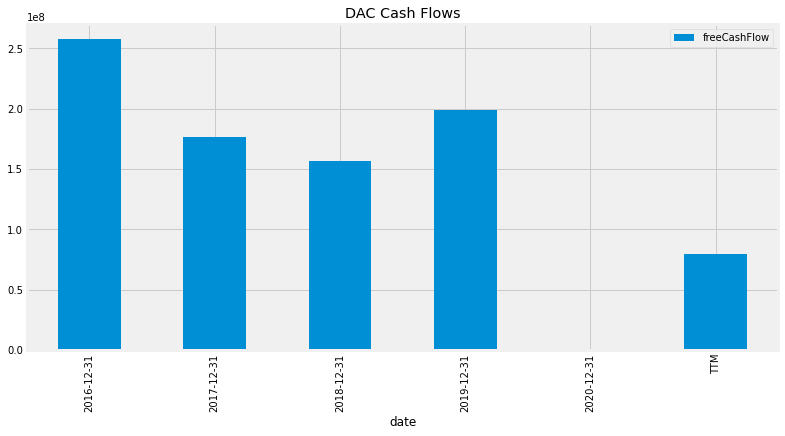

In [105]:
final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

In [106]:
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date')
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,65663000,0.0,0.0,7556000.0,0.0,45229000,118448000,2479937000,0.0,...,366652000,-86669000,1.035577e+09,1035577000,0.000000e+00,0.0,1343007000,1277344000,NaN,NaN
2020-09-30,NaN,106368000,0.0,106368000.0,31697000.0,9021000.0,13881000,162620000,2441815000,0.0,...,323473000,-110000000,0.000000e+00,999712000,2.696021e+09,13694000.0,1349297000,1242929000,NaN,NaN
2020-06-30,NaN,84955000,0.0,84955000.0,34928000.0,9358000.0,14144000,144738000,2466556000,0.0,...,280687000,-117000000,0.000000e+00,949812000,2.700079e+09,12230000.0,1363337000,1278382000,NaN,NaN
2020-03-31,NaN,97019000,0.0,97019000.0,29984000.0,8707000.0,15425000,152073000,2413730000,0.0,...,242191000,-124000000,0.000000e+00,903648000,2.661507e+09,10510000.0,1365310000,1268291000,NaN,NaN
2019-12-31,NaN,139170000,0.0,139170000.0,27657000.0,8494000.0,13607000,190386000,2389874000,0.0,...,213102000,-117000000,0.000000e+00,881690000,2.683019e+09,8965000.0,1390336000,1251166000,NaN,NaN


In [178]:

cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndCashEquivalents'] + q_balance_statement.iloc[0]['shortTermInvestments']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

Free Cash Flow:  79883000.0
Total Debt:  1343007000.0
Cash and ST Investments:  65663000.0


In [179]:

# List of data we want to extract from Finviz Table
metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find(text = metric).find_next(class_='snapshot-td2').text
   
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

finviz_data = get_finviz_data(ticker)

finviz_data

{'Price': 39.47, 'EPS next 5Y': 3.0, 'Beta': 1.71, 'Shs Outstand': 24570000.0}

In [180]:
Beta = finviz_data['Beta']

discount_rate = 7
if(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

print("Discount Rate: ", discount_rate)
discount_rate = 9

Discount Rate:  9


In [181]:
EPS_growth_5Y = finviz_data['EPS next 5Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 4)  # Slightly higher than long term inflation rate, conservative estimate

shares_outstanding = finviz_data['Shs Outstand']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

Free Cash Flow:  79883000.0
Total Debt:  1343007000.0
Cash and ST Investments:  65663000.0
EPS Growth 5Y:  3.0
EPS Growth 6Y to 10Y:  1.5
EPS Growth 11Y to 20Y:  1.5
Discount Rate:  9
Shares Outstanding:  24570000.0


Discounted Cash Flows

Year 1: $75485770.64220183
Year 2: $71330590.60685126
Year 3: $67404136.07803376
Year 4: $63693816.66089428
Year 5: $60187735.009835884
Year 6: $56046377.096315056
Year 7: $52189975.0025319
Year 8: $48598921.676669605
Year 9: $45254959.17598132
Year 10: $42141085.83818443
Year 11: $39241469.84014422
Year 12: $36541368.704354465
Year 13: $34027054.3439631
Year 14: $31685743.26525004
Year 15: $29505531.572686955
Year 16: $27475334.446125925
Year 17: $25584829.78240166
Year 18: $23824405.71480521
Year 19: $22185111.743603013
Year 20: $20658613.229134914


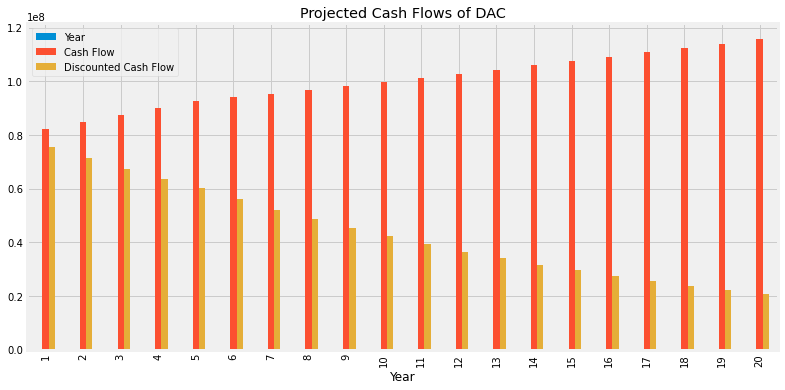

In [193]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 11 to 20
    for year in range(11, 21):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    intrinsic_value = (sum(cash_flow_discounted_list) + total_debt + cash_and_ST_investments)/shares_outstanding
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value


intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate) 

In [194]:
print("Ticker: ", ticker)
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)   

Ticker:  DAC
Intrinsic Value:  92.8666190651188
Current Price:  39.47
Margin of Safety:  57.49818352671661


In [168]:
company = 'AEO'
demo = apiKey
IS = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?apikey={demo}').json()
count = 0
#get revenue growth to estimate future sales
revenue_g = []
for item in IS:
  if count < 4:
    #print(item)
    revenue_g.append(item['revenue'])
    count = count + 1

revenue_g = (revenue_g[0] - revenue_g[1]) /revenue_g[1] 
print(revenue_g)

0.06752004598931541


In [169]:
#Get net income
net_income = IS[0]['netIncome']

BS = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?apikey={demo}').json()

#get income statement as % of revenue for future predictions and forecast 5 next IS years
income_statement = pd.DataFrame.from_dict(IS[0],orient='index')
#The [5:26] below get rids of not needed items coming from the API
income_statement = income_statement[6:27]
income_statement.columns = ['current_year']
income_statement['as_%_of_revenue'] = income_statement / income_statement.iloc[0]


In [170]:
#forecasting 5 next years income statement
income_statement['next_year'] =  (income_statement['current_year']['revenue'] * (1+revenue_g)) * income_statement['as_%_of_revenue'] 
income_statement['next_2_year'] =  (income_statement['next_year']['revenue'] * (1+revenue_g)) * income_statement['as_%_of_revenue'] 
income_statement['next_3_year'] =  (income_statement['next_2_year']['revenue'] * (1+revenue_g)) * income_statement['as_%_of_revenue'] 
income_statement['next_4_year'] =  (income_statement['next_3_year']['revenue'] * (1+revenue_g)) * income_statement['as_%_of_revenue'] 
income_statement['next_5_year'] =  (income_statement['next_4_year']['revenue'] * (1+revenue_g)) * income_statement['as_%_of_revenue'] 

#Get Balance sheet as a percentage of revenue
balance_sheet = pd.DataFrame.from_dict(BS[0],orient='index')
balance_sheet = balance_sheet[6:-3]
balance_sheet.columns = ['current_year']
balance_sheet['as_%_of_revenue'] = balance_sheet / income_statement['current_year'].iloc[0]

#forecasting the next 5 years Balance Sheet.
balance_sheet['next_year'] =  income_statement['next_year'] ['revenue'] * balance_sheet['as_%_of_revenue']
balance_sheet['next_2_year'] =  income_statement['next_2_year'] ['revenue'] * balance_sheet['as_%_of_revenue']
balance_sheet['next_3_year'] =  income_statement['next_3_year']['revenue'] * balance_sheet['as_%_of_revenue'] 
balance_sheet['next_4_year'] =  income_statement['next_4_year']['revenue']  * balance_sheet['as_%_of_revenue'] 
balance_sheet['next_5_year'] =  income_statement['next_5_year']['revenue'] * balance_sheet['as_%_of_revenue']

In [171]:
CF_forecast = {}
CF_forecast['next_year'] = {}
CF_forecast['next_year']['netIncome'] = income_statement['next_year']['netIncome']
CF_forecast['next_year']['inc_depreciation'] = income_statement['next_year']['depreciationAndAmortization']
CF_forecast['next_year']['inc_receivables'] = balance_sheet['next_year']['netReceivables'] - balance_sheet['current_year']['netReceivables']
CF_forecast['next_year']['inc_inventory'] = balance_sheet['next_year']['inventory'] - balance_sheet['current_year']['inventory']
CF_forecast['next_year']['inc_payables'] = balance_sheet['next_year']['accountPayables'] - balance_sheet['current_year']['accountPayables']
CF_forecast['next_year']['CF_operations'] = CF_forecast['next_year']['netIncome'] + CF_forecast['next_year']['inc_depreciation'] + (CF_forecast['next_year']['inc_receivables'] * -1) + (CF_forecast['next_year']['inc_inventory'] *-1) + CF_forecast['next_year']['inc_payables']
CF_forecast['next_year']['CAPEX'] = balance_sheet['next_year']['propertyPlantEquipmentNet'] - balance_sheet['current_year']['propertyPlantEquipmentNet'] + income_statement['next_year']['depreciationAndAmortization']

CF_forecast['next_year']['FCF'] = CF_forecast['next_year']['CAPEX'] + CF_forecast['next_year']['CF_operations']


CF_forecast['next_2_year'] = {}
CF_forecast['next_2_year']['netIncome'] = income_statement['next_2_year']['netIncome']

CF_forecast['next_2_year']['inc_depreciation'] = income_statement['next_2_year']['depreciationAndAmortization']
CF_forecast['next_2_year']['inc_receivables'] = balance_sheet['next_2_year']['netReceivables'] - balance_sheet['next_year']['netReceivables']
CF_forecast['next_2_year']['inc_inventory'] = balance_sheet['next_2_year']['inventory'] - balance_sheet['next_year']['inventory']
CF_forecast['next_2_year']['inc_payables'] = balance_sheet['next_2_year']['accountPayables'] - balance_sheet['next_year']['accountPayables']
CF_forecast['next_2_year']['CF_operations'] = CF_forecast['next_2_year']['netIncome'] + CF_forecast['next_2_year']['inc_depreciation'] + (CF_forecast['next_2_year']['inc_receivables'] * -1) + (CF_forecast['next_2_year']['inc_inventory'] *-1) + CF_forecast['next_2_year']['inc_payables']
CF_forecast['next_2_year']['CAPEX'] = balance_sheet['next_2_year']['propertyPlantEquipmentNet'] - balance_sheet['next_year']['propertyPlantEquipmentNet'] + income_statement['next_2_year']['depreciationAndAmortization']
CF_forecast['next_2_year']['FCF'] = CF_forecast['next_2_year']['CAPEX'] + CF_forecast['next_2_year']['CF_operations']


CF_forecast['next_3_year'] = {}
CF_forecast['next_3_year']['netIncome'] = income_statement['next_3_year']['netIncome']

CF_forecast['next_3_year']['inc_depreciation'] = income_statement['next_3_year']['depreciationAndAmortization'] 
CF_forecast['next_3_year']['inc_receivables'] = balance_sheet['next_3_year']['netReceivables'] - balance_sheet['next_2_year']['netReceivables']
CF_forecast['next_3_year']['inc_inventory'] = balance_sheet['next_3_year']['inventory'] - balance_sheet['next_2_year']['inventory']
CF_forecast['next_3_year']['inc_payables'] = balance_sheet['next_3_year']['accountPayables'] - balance_sheet['next_2_year']['accountPayables']
CF_forecast['next_3_year']['CF_operations'] = CF_forecast['next_3_year']['netIncome'] + CF_forecast['next_3_year']['inc_depreciation'] + (CF_forecast['next_3_year']['inc_receivables'] * -1) + (CF_forecast['next_3_year']['inc_inventory'] *-1) + CF_forecast['next_3_year']['inc_payables']
CF_forecast['next_3_year']['CAPEX'] = balance_sheet['next_3_year']['propertyPlantEquipmentNet'] - balance_sheet['next_2_year']['propertyPlantEquipmentNet'] + income_statement['next_3_year']['depreciationAndAmortization']
CF_forecast['next_3_year']['FCF'] = CF_forecast['next_3_year']['CAPEX'] + CF_forecast['next_3_year']['CF_operations']


CF_forecast['next_4_year'] = {}
CF_forecast['next_4_year']['netIncome'] = income_statement['next_4_year']['netIncome']

CF_forecast['next_4_year']['inc_depreciation'] = income_statement['next_4_year']['depreciationAndAmortization']
CF_forecast['next_4_year']['inc_receivables'] = balance_sheet['next_4_year']['netReceivables'] - balance_sheet['next_3_year']['netReceivables']
CF_forecast['next_4_year']['inc_inventory'] = balance_sheet['next_4_year']['inventory'] - balance_sheet['next_3_year']['inventory']
CF_forecast['next_4_year']['inc_payables'] = balance_sheet['next_4_year']['accountPayables'] - balance_sheet['next_3_year']['accountPayables']
CF_forecast['next_4_year']['CF_operations'] = CF_forecast['next_4_year']['netIncome'] + CF_forecast['next_4_year']['inc_depreciation'] + (CF_forecast['next_4_year']['inc_receivables'] * -1) + (CF_forecast['next_4_year']['inc_inventory'] *-1) + CF_forecast['next_4_year']['inc_payables']
CF_forecast['next_4_year']['CAPEX'] = balance_sheet['next_4_year']['propertyPlantEquipmentNet'] - balance_sheet['next_3_year']['propertyPlantEquipmentNet'] + income_statement['next_4_year']['depreciationAndAmortization']
CF_forecast['next_4_year']['FCF'] = CF_forecast['next_4_year']['CAPEX'] + CF_forecast['next_4_year']['CF_operations']

CF_forecast['next_5_year'] = {}
CF_forecast['next_5_year']['netIncome'] = income_statement['next_5_year']['netIncome']

CF_forecast['next_5_year']['inc_depreciation'] = income_statement['next_5_year']['depreciationAndAmortization'] 
CF_forecast['next_5_year']['inc_receivables'] = balance_sheet['next_5_year']['netReceivables'] - balance_sheet['next_4_year']['netReceivables']
CF_forecast['next_5_year']['inc_inventory'] = balance_sheet['next_5_year']['inventory'] - balance_sheet['next_4_year']['inventory']
CF_forecast['next_5_year']['inc_payables'] = balance_sheet['next_5_year']['accountPayables'] - balance_sheet['next_4_year']['accountPayables']
CF_forecast['next_5_year']['CF_operations'] = CF_forecast['next_5_year']['netIncome'] + CF_forecast['next_5_year']['inc_depreciation'] + (CF_forecast['next_5_year']['inc_receivables'] * -1) + (CF_forecast['next_5_year']['inc_inventory'] *-1) + CF_forecast['next_5_year']['inc_payables']
CF_forecast['next_5_year']['CAPEX'] = balance_sheet['next_5_year']['propertyPlantEquipmentNet'] - balance_sheet['next_4_year']['propertyPlantEquipmentNet'] + income_statement['next_5_year']['depreciationAndAmortization']
CF_forecast['next_5_year']['FCF'] = CF_forecast['next_5_year']['CAPEX'] + CF_forecast['next_5_year']['CF_operations']

In [172]:
#add the forecasted cash flows into a Pandas
CF_forec = pd.DataFrame.from_dict(CF_forecast,orient='columns')

#add below option to format the dataframe with thousand separators
pd.options.display.float_format = '{:,.0f}'.format

print(CF_forec)

                   next_year  next_2_year  next_3_year  next_4_year  \
netIncome        204,170,681  217,956,295  232,672,714  248,382,787   
inc_depreciation 193,625,718  206,699,336  220,655,684  235,554,366   
inc_receivables    8,039,207    8,582,014    9,161,472    9,780,055   
inc_inventory     30,132,711   32,167,273   34,339,209   36,657,794   
inc_payables      19,293,583   20,596,287   21,986,949   23,471,509   
CF_operations    378,918,065  404,502,630  431,814,666  460,970,813   
CAPEX            339,066,328  361,960,102  386,399,665  412,489,388   
FCF              717,984,393  766,462,733  818,214,331  873,460,201   

                  next_5_year  
netIncome         265,153,604  
inc_depreciation  251,459,008  
inc_receivables    10,440,405  
inc_inventory      39,132,930  
inc_payables       25,056,306  
CF_operations     492,095,583  
CAPEX             440,340,691  
FCF               932,436,274  


In [173]:
import pandas_datareader.data as web
import datetime
import requests


demo = apiKey
#Interest coverage ratio = EBIT / interest expenses

def interest_coveraga_and_RF(company):
  IS= requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?apikey={demo}').json()
  EBIT= IS[0]['ebitda'] - IS[0]['depreciationAndAmortization'] 
  interest_expense = IS[0]['interestExpense']
  interest_coverage_ratio = EBIT / interest_expense

    #RF
  start = datetime.datetime(2019, 7, 10)
        
  end= datetime.datetime.today().strftime('%Y-%m-%d')
  #end = datetime.datetime(2020, 7, 10)

  Treasury = web.DataReader(['TB1YR'], 'fred', start, end)
  RF = float(Treasury.iloc[-1])
  RF = RF/100
  return [RF,interest_coverage_ratio]
  
#Cost of debt
def cost_of_debt(company, RF,interest_coverage_ratio):
  if interest_coverage_ratio > 8.5:
    #Rating is AAA
    credit_spread = 0.0063
  if (interest_coverage_ratio > 6.5) & (interest_coverage_ratio <= 8.5):
    #Rating is AA
    credit_spread = 0.0078
  if (interest_coverage_ratio > 5.5) & (interest_coverage_ratio <=  6.5):
    #Rating is A+
    credit_spread = 0.0098
  if (interest_coverage_ratio > 4.25) & (interest_coverage_ratio <=  5.49):
    #Rating is A
    credit_spread = 0.0108
  if (interest_coverage_ratio > 3) & (interest_coverage_ratio <=  4.25):
    #Rating is A-
    credit_spread = 0.0122
  if (interest_coverage_ratio > 2.5) & (interest_coverage_ratio <=  3):
    #Rating is BBB
    credit_spread = 0.0156
  if (interest_coverage_ratio > 2.25) & (interest_coverage_ratio <=  2.5):
    #Rating is BB+
    credit_spread = 0.02
  if (interest_coverage_ratio > 2) & (interest_coverage_ratio <=  2.25):
    #Rating is BB
    credit_spread = 0.0240
  if (interest_coverage_ratio > 1.75) & (interest_coverage_ratio <=  2):
    #Rating is B+
    credit_spread = 0.0351
  if (interest_coverage_ratio > 1.5) & (interest_coverage_ratio <=  1.75):
    #Rating is B
    credit_spread = 0.0421
  if (interest_coverage_ratio > 1.25) & (interest_coverage_ratio <=  1.5):
    #Rating is B-
    credit_spread = 0.0515
  if (interest_coverage_ratio > 0.8) & (interest_coverage_ratio <=  1.25):
    #Rating is CCC
    credit_spread = 0.0820
  if (interest_coverage_ratio > 0.65) & (interest_coverage_ratio <=  0.8):
    #Rating is CC
    credit_spread = 0.0864
  if (interest_coverage_ratio > 0.2) & (interest_coverage_ratio <=  0.65):
    #Rating is C
    credit_spread = 0.1134
  if interest_coverage_ratio <=  0.2:
    #Rating is D
    credit_spread = 0.1512
  
  cost_of_debt = RF + credit_spread
  return cost_of_debt


def costofequity(company):


  #RF
  start = datetime.datetime(2019, 7, 10)
  end= datetime.datetime.today().strftime('%Y-%m-%d')
  #end = datetime.datetime(2020, 7, 10)

  Treasury = web.DataReader(['TB1YR'], 'fred', start, end)
  RF = float(Treasury.iloc[-1])
  RF = RF/100

#Beta

  beta = requests.get(f'https://financialmodelingprep.com/api/v3/company/profile/{company}?apikey={demo}')
  beta = beta.json()
  beta = float(beta['profile']['beta'])


  #Market Return
  start = datetime.datetime(2019, 7, 10)
  end= datetime.datetime.today().strftime('%Y-%m-%d')

  SP500 = web.DataReader(['sp500'], 'fred', start, end)
      #Drop all Not a number values using drop method.
  SP500.dropna(inplace = True)

  SP500yearlyreturn = (SP500['sp500'].iloc[-1]/ SP500['sp500'].iloc[-252])-1
    
  cost_of_equity = RF+(beta*(SP500yearlyreturn - RF))
  return cost_of_equity

#effective tax rate and capital structure
def wacc(company):
  FR = requests.get(f'https://financialmodelingprep.com/api/v3/ratios/{company}?apikey={demo}').json()

  ETR = FR[0]['effectiveTaxRate']

# 
  BS = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period=quarter&apikey={demo}').json()



  Debt_to = BS[0]['totalDebt'] / (BS[0]['totalDebt'] + BS[0]['totalStockholdersEquity'])
  equity_to = BS[0]['totalStockholdersEquity'] / (BS[0]['totalDebt'] + BS[0]['totalStockholdersEquity'])

  WACC = (kd*(1-ETR)*Debt_to) + (ke*equity_to)
  return WACC

RF_and_IntCov = interest_coveraga_and_RF(company)
RF = RF_and_IntCov[0]
interest_coverage_ratio = RF_and_IntCov[1]
ke = costofequity(company)
kd = cost_of_debt(company,RF,interest_coverage_ratio)
wacc_company = wacc(company)
print('wacc of ' + company + ' is ' + str((wacc_company*100))+'%')

ZeroDivisionError: float division by zero

In [ ]:
#FCF List of CFs for each year
import numpy_financial as npf
FCF_List = CF_forec.iloc[-1].values.tolist()
npv = npf.npv(wacc_company,FCF_List)

In [ ]:
#Terminal value
LTGrowth = 0.02

Terminal_value = (CF_forecast['next_5_year']['FCF'] * (1+ LTGrowth)) /(wacc_company  - LTGrowth)

Terminal_value_Discounted = Terminal_value/(1+wacc_company)**4
Terminal_value_Discounted

In [ ]:
target_equity_value = Terminal_value_Discounted + npv
debt = balance_sheet['current_year']['totalDebt']
target_value = target_equity_value - debt
numbre_of_shares = requests.get(f'https://financialmodelingprep.com/api/v3/enterprise-values/{company}?apikey={demo}').json()
numbre_of_shares = numbre_of_shares[0]['numberOfShares']

target_price_per_share = target_value/numbre_of_shares
target_price_per_share

print(company + ' forecasted price per stock is ' + str(target_price_per_share) )
print('the forecast is based on the following assumptions: '+ 'revenue growth: ' + str(revenue_g) + ' Cost of Capital: ' + str(wacc_company) )
print('perpetuity growth: ' + str(LTGrowth)  )


In [174]:
IS

[{'date': '2020-02-01',
  'symbol': 'AEO',
  'reportedCurrency': 'USD',
  'fillingDate': '2020-03-12 00:00:00',
  'acceptedDate': '2020-03-12 16:17:08',
  'period': 'FY',
  'revenue': 4308212000,
  'costOfRevenue': 2785911000,
  'grossProfit': 1522301000,
  'grossProfitRatio': 0.353349,
  'researchAndDevelopmentExpenses': 0.0,
  'generalAndAdministrativeExpenses': 1029412000,
  'sellingAndMarketingExpenses': 0.0,
  'otherExpenses': 11933000,
  'operatingExpenses': 1288956000,
  'costAndExpenses': 4074867000,
  'interestExpense': 0.0,
  'depreciationAndAmortization': 181379000,
  'ebitda': 426657000,
  'ebitdaratio': 0.099033,
  'operatingIncome': 233345000,
  'operatingIncomeRatio': 0.054163,
  'totalOtherIncomeExpensesNet': 11933000,
  'incomeBeforeTax': 245278000,
  'incomeBeforeTaxRatio': 0.056933,
  'incomeTaxExpense': 54021000,
  'netIncome': 191257000,
  'netIncomeRatio': 0.044394,
  'eps': 1.11933,
  'epsdiluted': 1.11933,
  'weightedAverageShsOut': 170867000,
  'weightedAverage